In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Clinical Data
clinical_train = pd.read_csv("data/X_train/clinical_train.csv")
clinical_test = pd.read_csv("data/X_test/clinical_test.csv")

# Molecular Data
molecular_train = pd.read_csv("data/X_train/molecular_train.csv")
molecular_test = pd.read_csv("data/X_test/molecular_test.csv")

target_train = pd.read_csv("data/X_train/target_train.csv")

# Preview the data
clinical_train.head()

,ID,CENTER,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,CYTOGENETICS
0,P132697,MSK,14.0,2.8,0.2,0.7,7.6,119.0,"46,xy,del(20)(q12)[2]/46,xy[18]"
1,P132698,MSK,1.0,7.4,2.4,0.1,11.6,42.0,"46,xx"
2,P116889,MSK,15.0,3.7,2.1,0.1,14.2,81.0,"46,xy,t(3;3)(q25;q27)[8]/46,xy[12]"
3,P132699,MSK,1.0,3.9,1.9,0.1,8.9,77.0,"46,xy,del(3)(q26q27)[15]/46,xy[5]"
4,P132700,MSK,6.0,128.0,9.7,0.9,11.1,195.0,"46,xx,t(3;9)(p13;q22)[10]/46,xx[10]"


## `clinical_train.csv`

In [43]:
clinical_train.isna().mean()

ID              0.000000
CENTER          0.000000
BM_BLAST        0.032802
WBC             0.081854
ANC             0.058080
MONOCYTES       0.180861
HB              0.033103
PLT             0.037316
CYTOGENETICS    0.116461
dtype: float64

In [44]:
clinical_train.select_dtypes(include="number").corr()

,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT
BM_BLAST,1.000000,0.100346,-0.008412,0.140248,-0.054530,-0.218223
WBC,0.100346,1.000000,0.847096,0.748100,0.013184,0.020631
ANC,-0.008412,0.847096,1.000000,0.592817,0.012768,0.074716
MONOCYTES,0.140248,0.748100,0.592817,1.000000,0.041912,-0.019550
HB,-0.054530,0.013184,0.012768,0.041912,1.000000,-0.059378
PLT,-0.218223,0.020631,0.074716,-0.019550,-0.059378,1.000000


In [45]:
molecular_train.isna().mean()

ID                0.000000
CHR               0.010425
START             0.010425
END               0.010425
REF               0.010425
ALT               0.010425
GENE              0.000000
PROTEIN_CHANGE    0.001097
EFFECT            0.000000
VAF               0.008139
DEPTH             0.010425
dtype: float64

In [46]:
target_train["OS_STATUS"].isna().mean()

np.float64(0.04513993379476377)

## `target_train.csv`

In [47]:
target_train.isna().mean()

ID           0.00000
OS_YEARS     0.04514
OS_STATUS    0.04514
dtype: float64

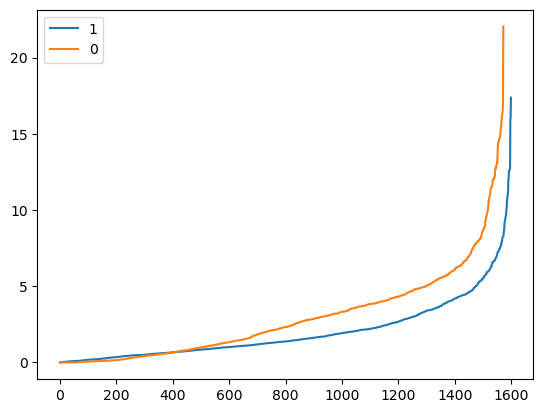

In [48]:
plt.plot(
    target_train[target_train["OS_STATUS"].astype(bool)]["OS_YEARS"]
    .sort_values()
    .to_numpy(),
    label=1,
)
plt.plot(
    target_train[~target_train["OS_STATUS"].astype(bool)]["OS_YEARS"]
    .sort_values()
    .to_numpy(),
    label=0,
)
plt.legend()
plt.show()